In [4]:
import pandas as pd

# 从URL导入数据
url = "https://storage.googleapis.com/dft-statistics/road-traffic/downloads/rawcount/region_id/dft_rawcount_region_id_3.csv"
data = pd.read_csv(url)

# 查看前几行数据以确保成功加载
print(data.head())

print(data.shape)

# 检查每列中的缺失值数量
missing_values = data.isnull().sum()

# 只显示有缺失值的列
missing_columns = missing_values[missing_values > 0]

print("含有缺失值的列及其缺失值数量：")
print(missing_columns)

# 删除含有缺失值的列
data_cleaned = data.dropna(axis=1)

# 查看新的数据集的行列数
print("删除含有缺失值的列后，数据的形状（行数，列数）：")
print(data_cleaned.shape)

   count_point_id direction_of_travel  year  count_date  hour  region_id  \
0              62                   E  2021  2021-09-15     7          3   
1              62                   E  2021  2021-09-15     8          3   
2              62                   E  2021  2021-09-15     9          3   
3              62                   E  2021  2021-09-15    10          3   
4              62                   E  2021  2021-09-15    11          3   

  region_name  local_authority_id local_authority_name road_name  ...  \
0    Scotland                   4    North Lanarkshire       M80  ...   
1    Scotland                   4    North Lanarkshire       M80  ...   
2    Scotland                   4    North Lanarkshire       M80  ...   
3    Scotland                   4    North Lanarkshire       M80  ...   
4    Scotland                   4    North Lanarkshire       M80  ...   

  buses_and_coaches lgvs hgvs_2_rigid_axle  hgvs_3_rigid_axle  \
0                 1  707               

/var/folders/sb/cb4176cn5mx75n98wbrpd2mh0000gn/T/ipykernel_2255/1092338246.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [8]:
# 选择需要处理的七列
columns_to_interpolate = [
    'pedal_cycles',
    'two_wheeled_motor_vehicles',
    'cars_and_taxis',
    'buses_and_coaches',
    'lgvs',
    'all_hgvs',
    'all_motor_vehicles'
]

# 针对整个数据框进行插值
for col in columns_to_interpolate:
    data_cleaned[col] = data_cleaned[col].interpolate(method='linear', inplace=False)


/var/folders/sb/cb4176cn5mx75n98wbrpd2mh0000gn/T/ipykernel_2255/4248910492.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].interpolate(method='linear', inplace=False)


In [9]:
# 检查插值后的数据是否仍有缺失值
missing_after_interpolation = data_cleaned[columns_to_interpolate].isnull().sum()
print("插值后仍有缺失值的列及其数量：")
print(missing_after_interpolation)

# 结果检查（可选）：查看某个 count_point_id 的数据变化
sample_id = data['count_point_id'].iloc[0]
print(f"示例计数点（ID={sample_id}）的插值前后数据：")
print(data.loc[data['count_point_id'] == sample_id, columns_to_interpolate])
print(data_cleaned.loc[data_cleaned['count_point_id'] == sample_id, columns_to_interpolate])


插值后仍有缺失值的列及其数量：
pedal_cycles                  0
two_wheeled_motor_vehicles    0
cars_and_taxis                0
buses_and_coaches             0
lgvs                          0
all_hgvs                      0
all_motor_vehicles            0
dtype: int64
示例计数点（ID=62）的插值前后数据：
    pedal_cycles  two_wheeled_motor_vehicles  cars_and_taxis  \
0              0                           1            1741   
1              0                           1            1663   
2              0                           0            1178   
3              0                           0            1214   
4              0                           1            1367   
5              0                           2            1220   
6              0                           4            1311   
7              0                           5            1373   
8              0                           5            1481   
9              0                           4            1904   
10             0      

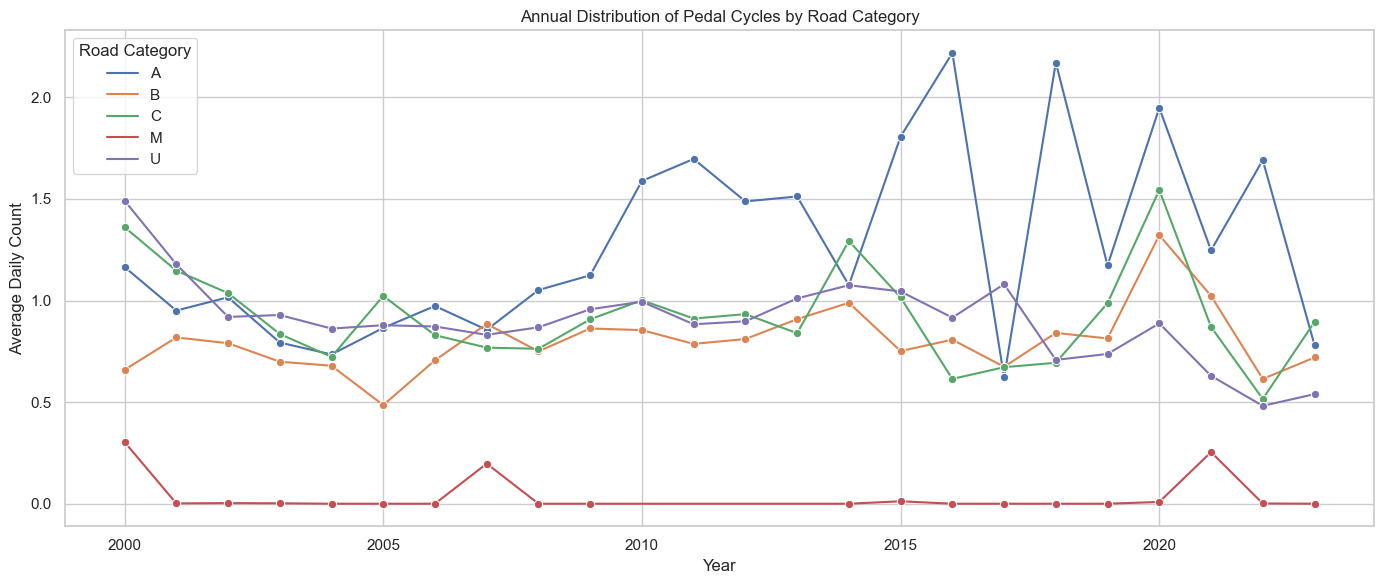

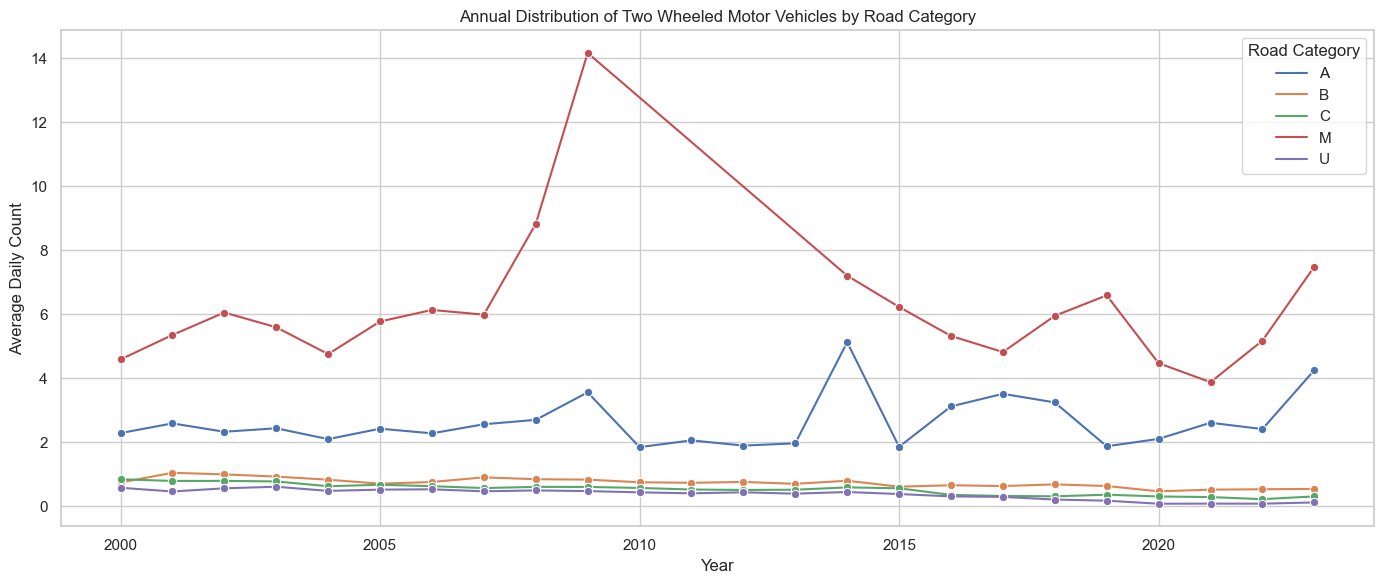

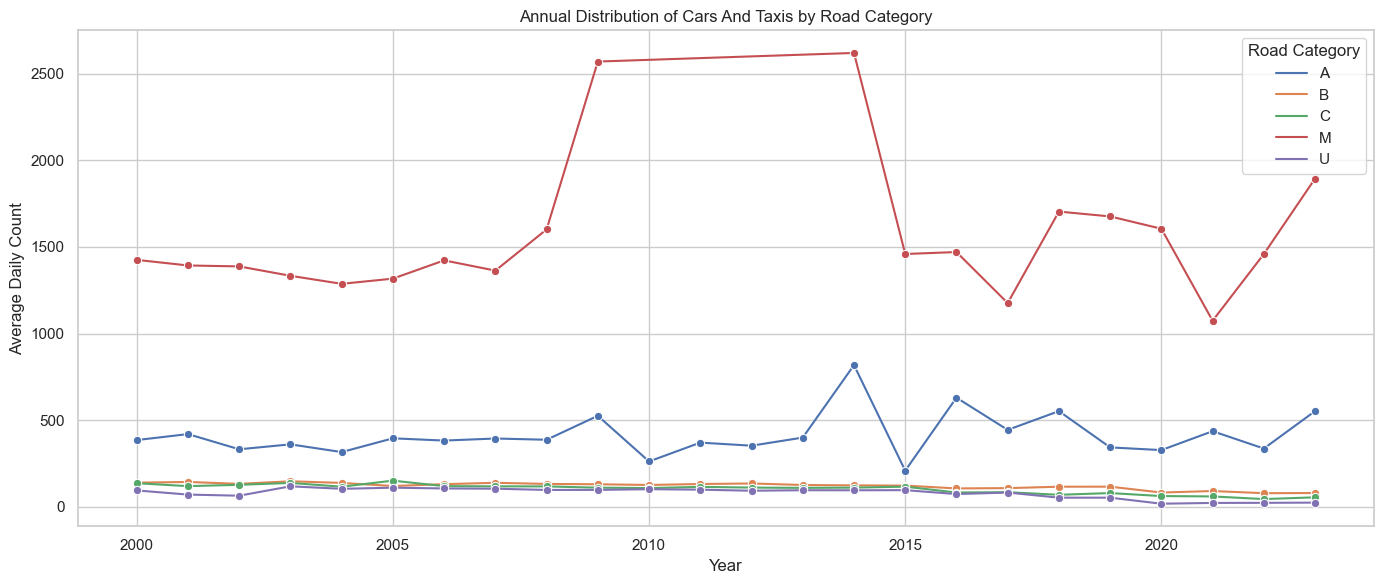

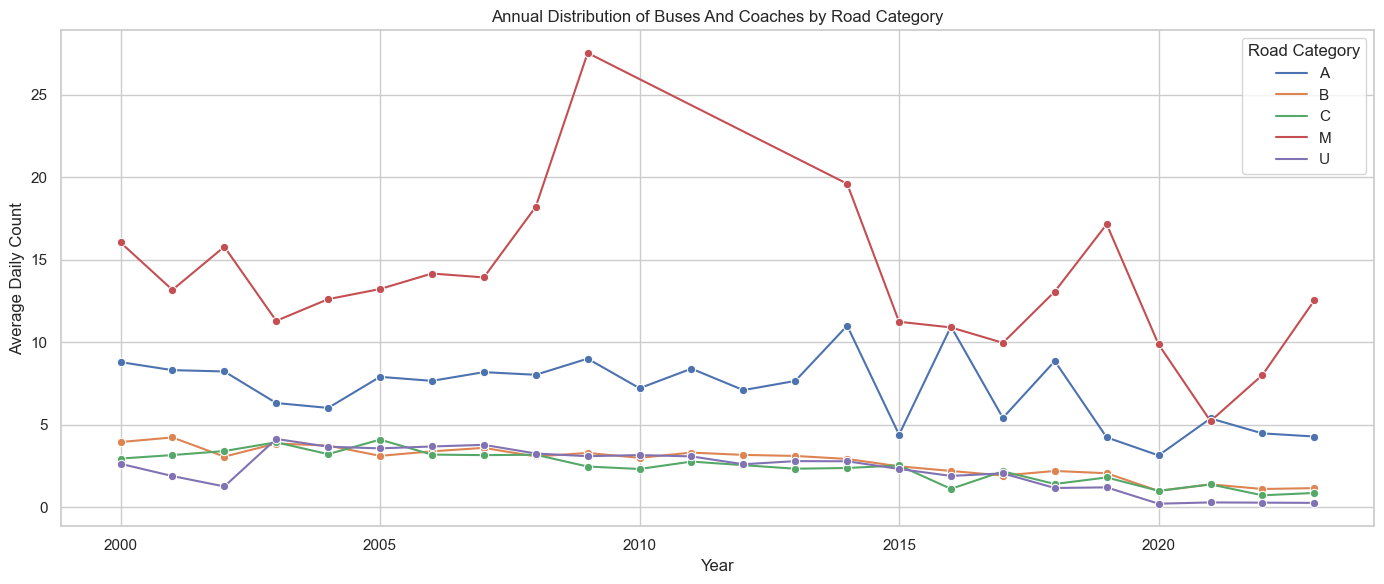

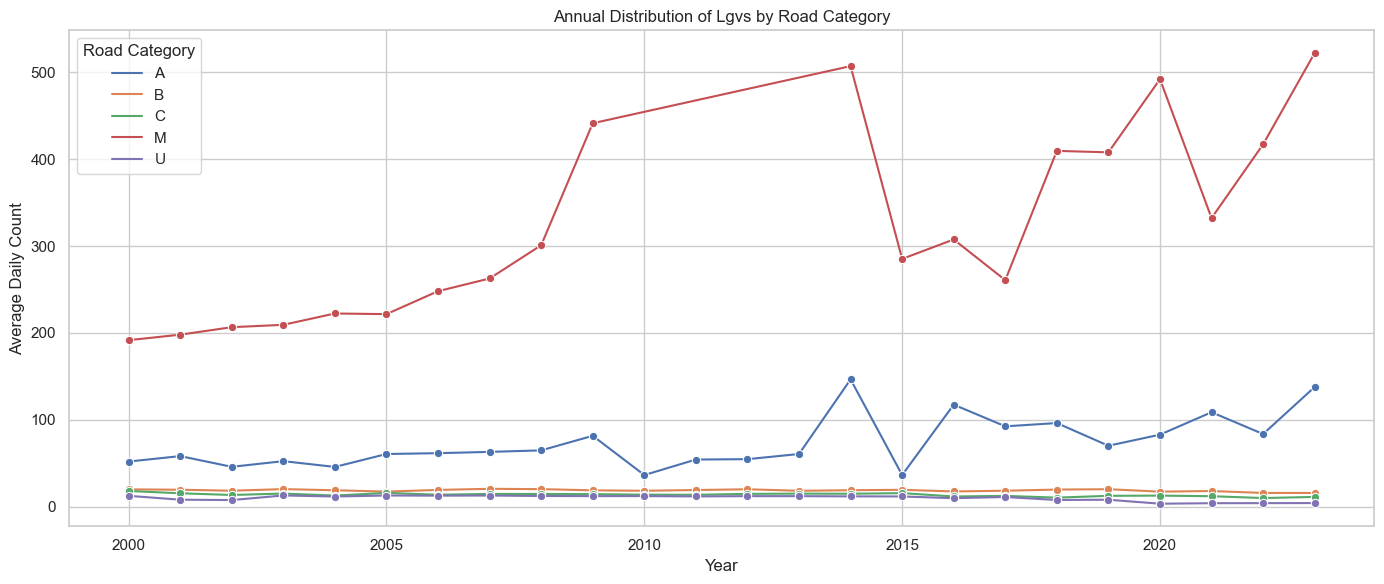

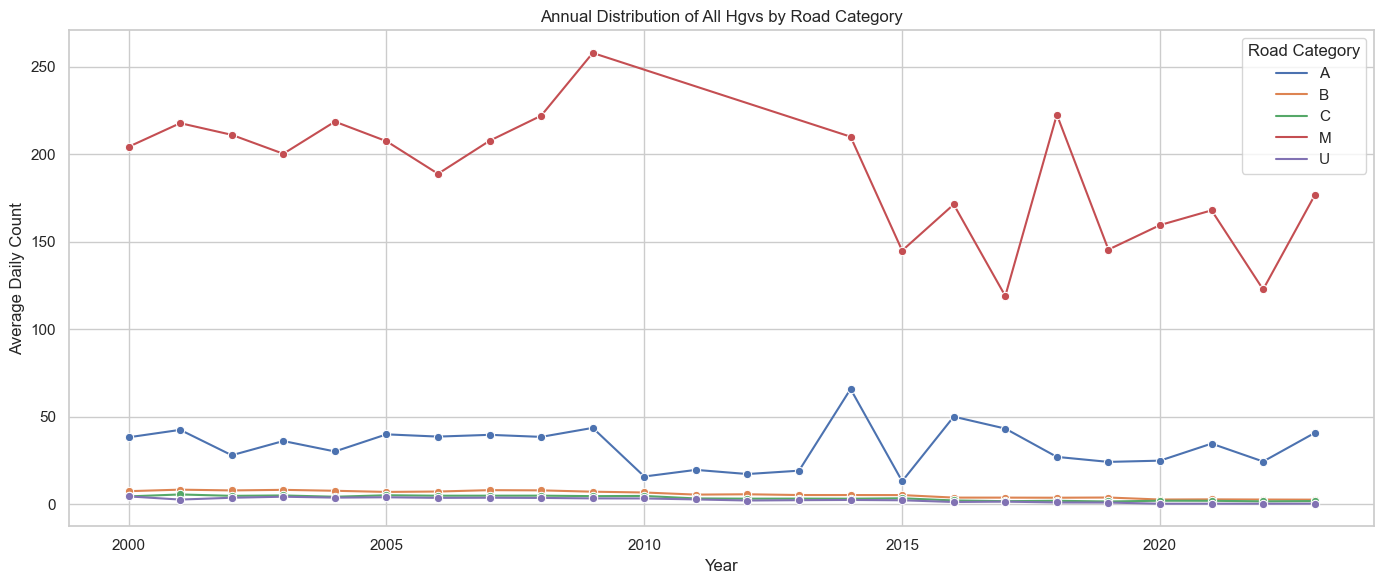

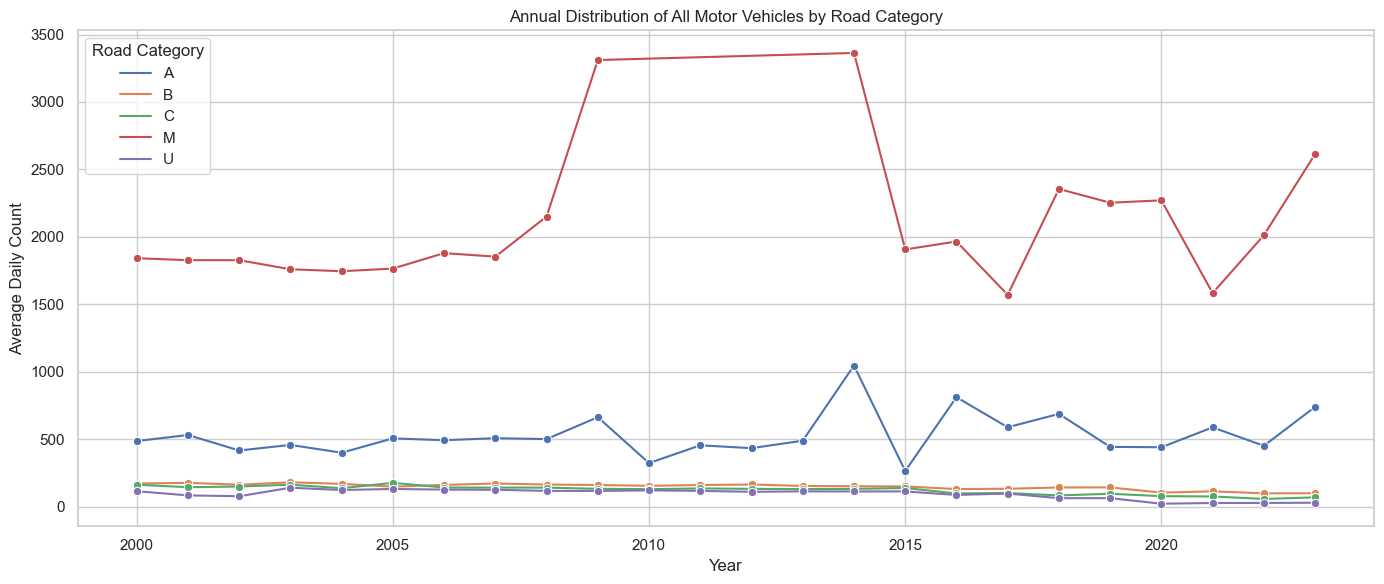

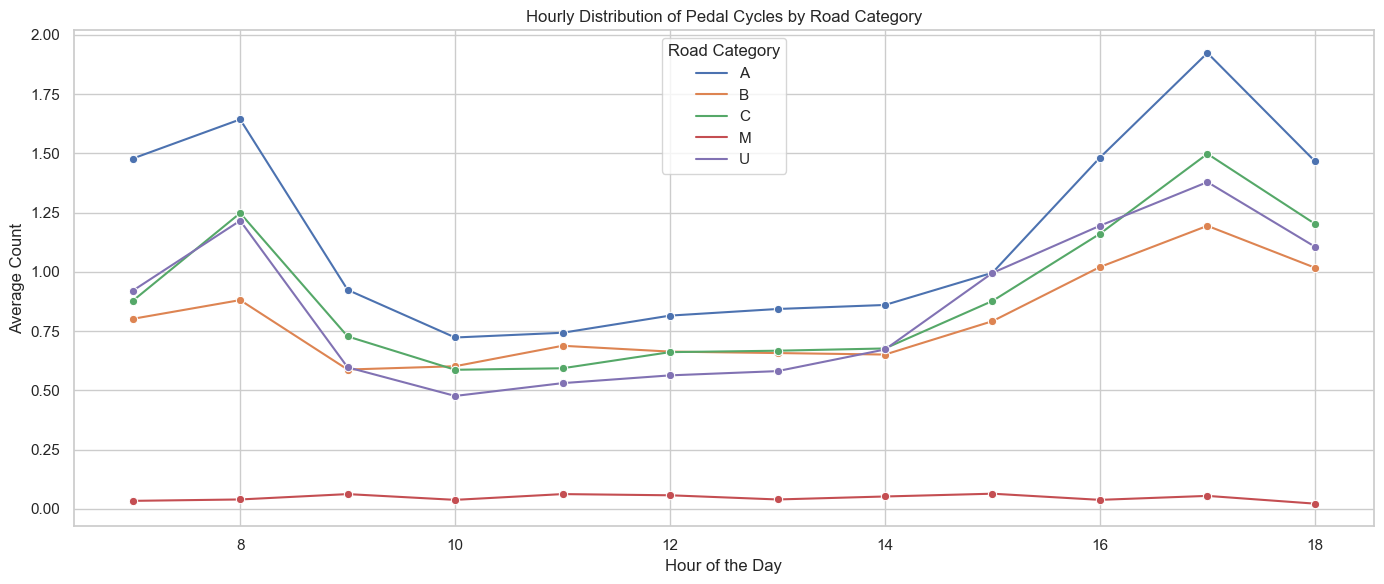

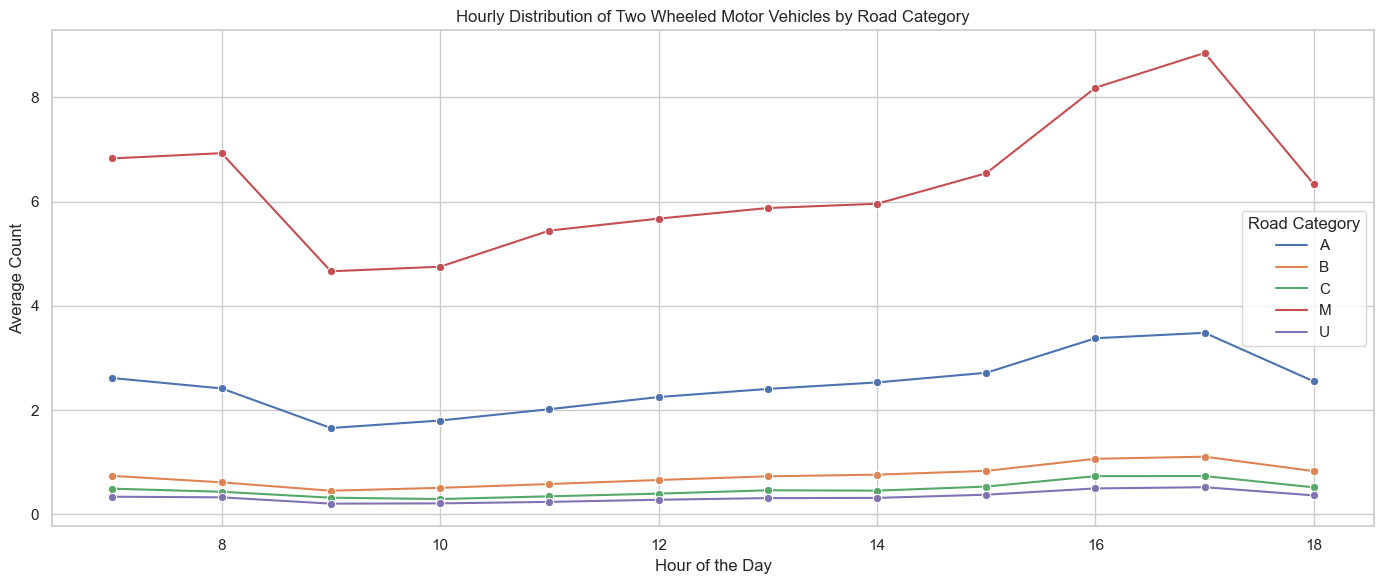

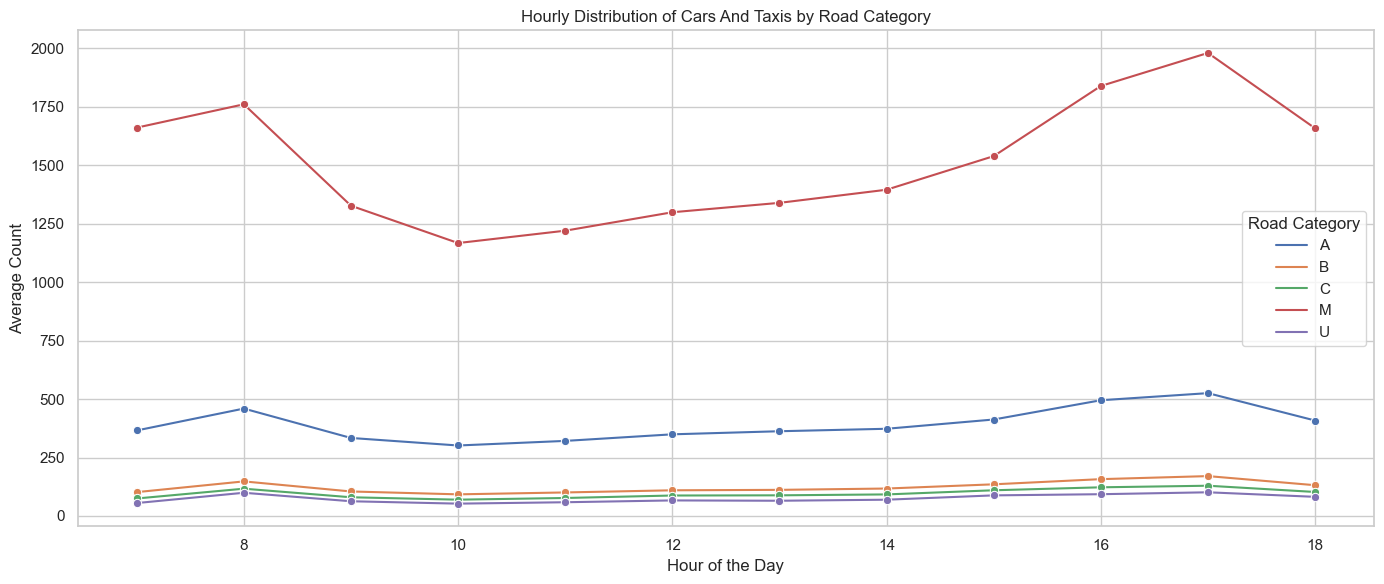

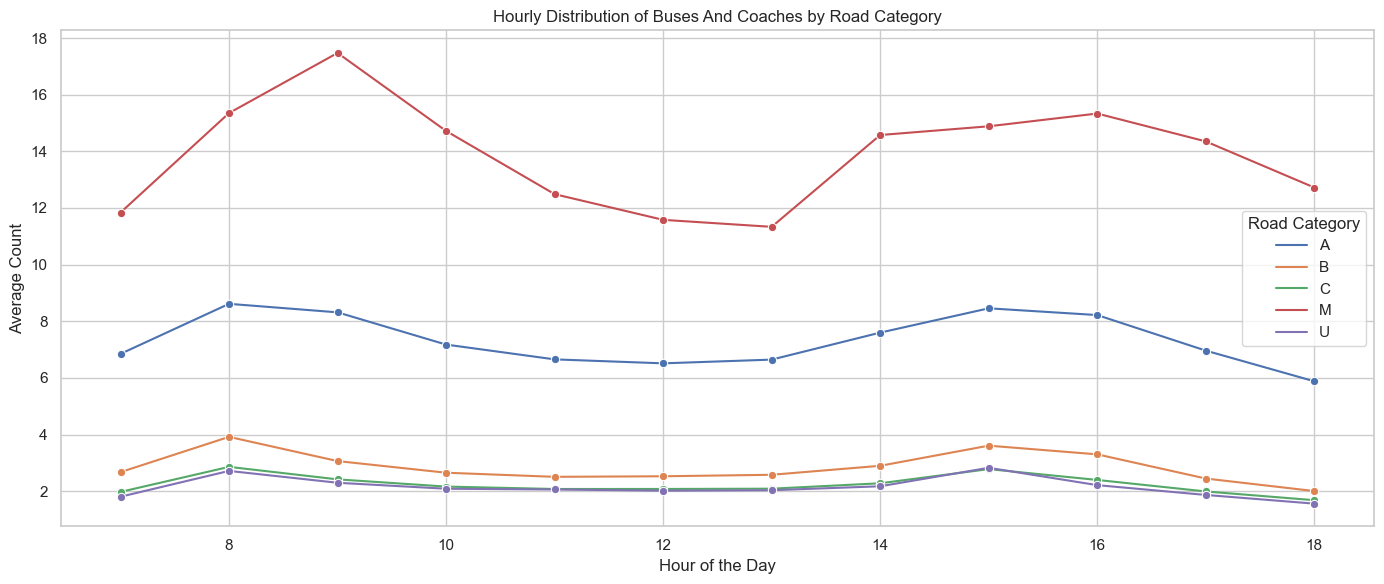

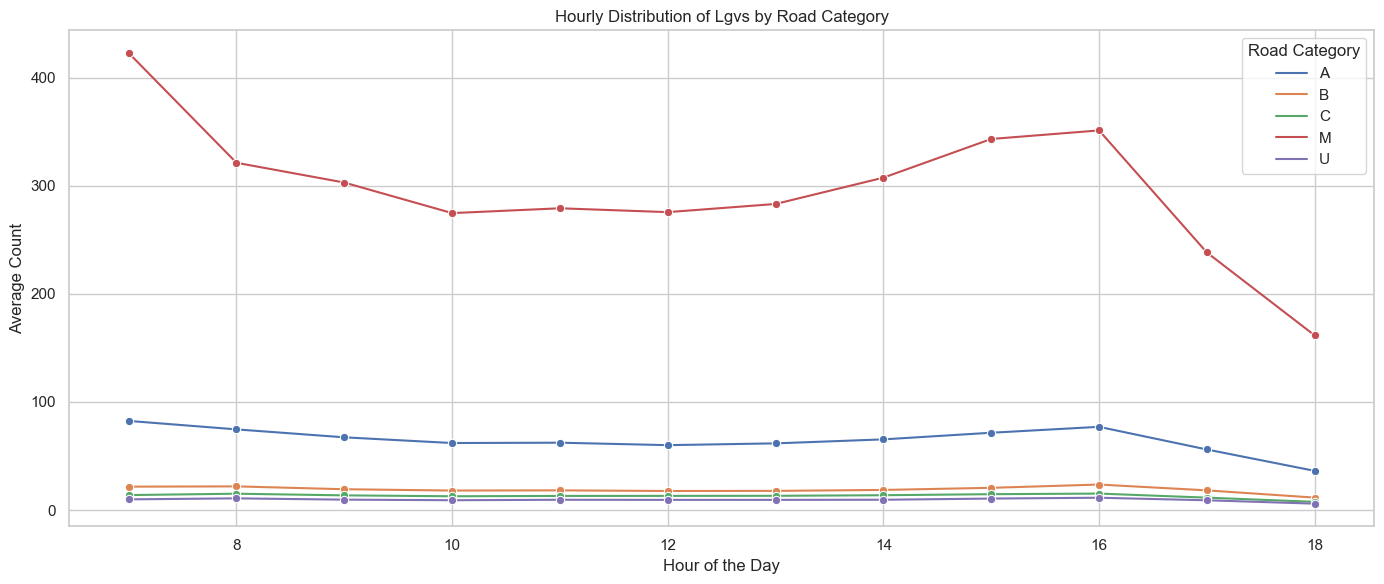

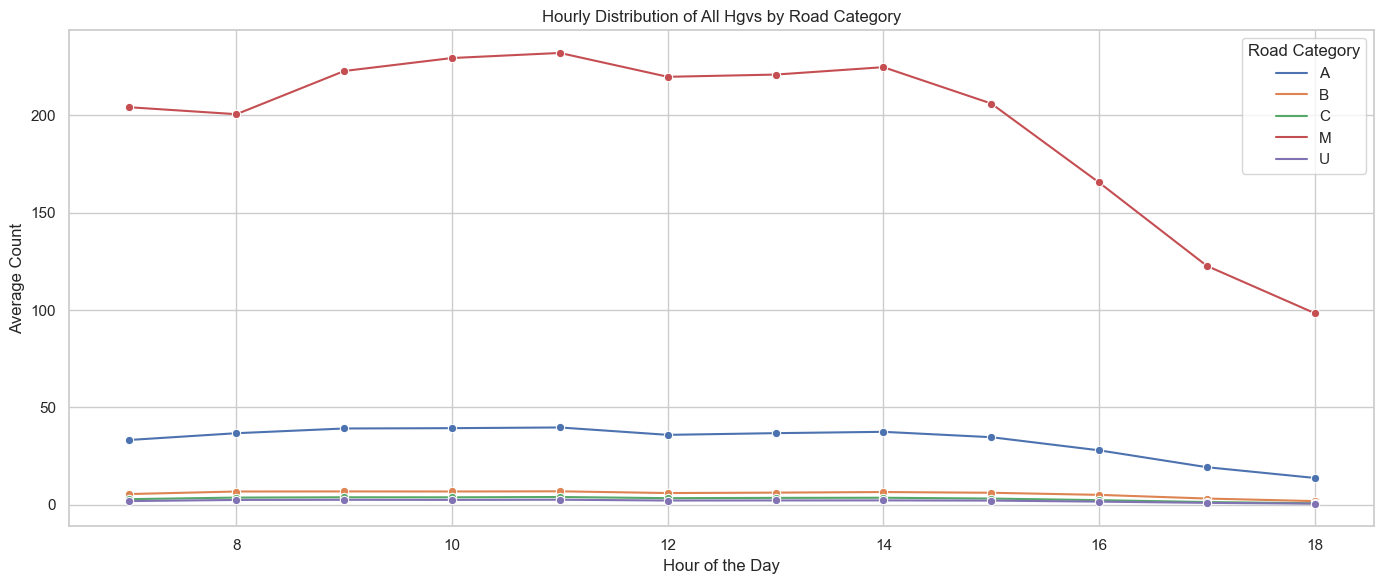

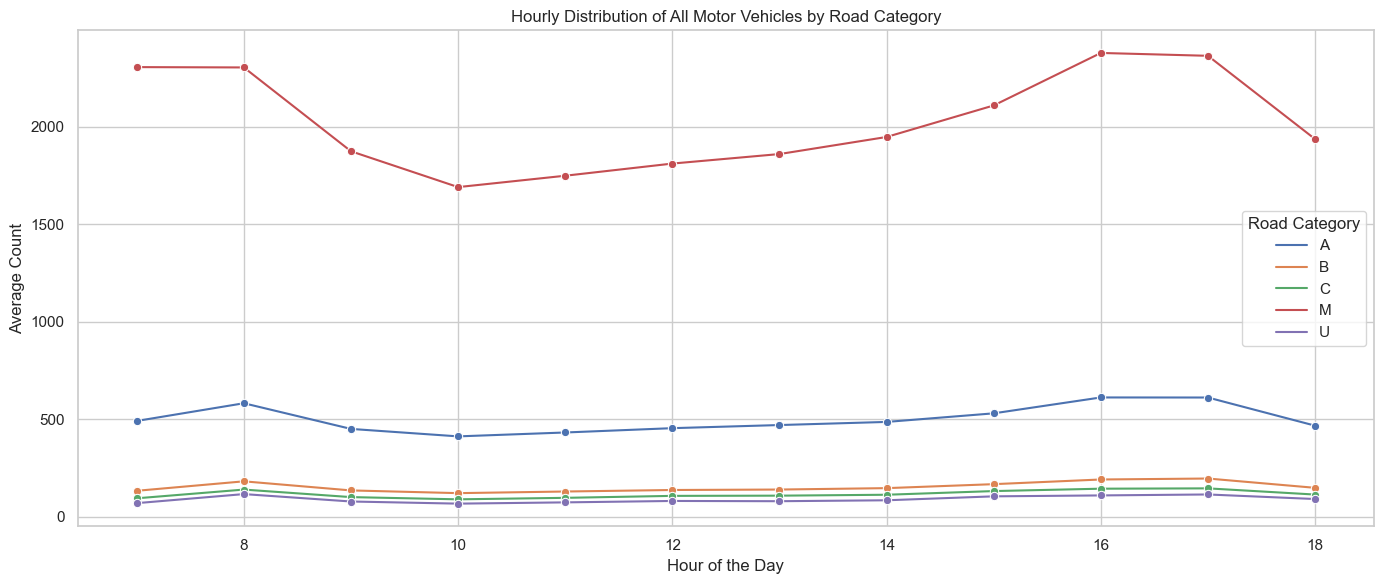

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: 导入数据（假设已经完成插值处理后的 data_cleaned 数据）
data = data_cleaned

# Step 2: 从 road_name 提取道路类别，并创建新列 road_category
data['road_category'] = data['road_name'].str[0]

# Step 3: 筛选出 M, A, B, C, U 五种道路类型的数据
data = data[data['road_category'].isin(['M', 'A', 'B', 'C', 'U'])]

# Step 4: 保留七列车辆类型进行分析
vehicle_columns = [
    'pedal_cycles',
    'two_wheeled_motor_vehicles',
    'cars_and_taxis',
    'buses_and_coaches',
    'lgvs',
    'all_hgvs',
    'all_motor_vehicles'
]

# Step 5: 按年和道路类型聚合数据，计算每种车辆类型的平均值
annual_road_vehicle_distribution = data.groupby(['year', 'road_category'])[vehicle_columns].mean().reset_index()

# Step 6: 按小时和道路类型聚合数据，计算每种车辆类型的平均值
hourly_distribution = data.groupby(['hour', 'road_category'])[vehicle_columns].mean().reset_index()

# Step 7: 设置可视化风格
sns.set(style="whitegrid")

# 年度变化图表：不同道路类型的车辆类型分布趋势
for vehicle in vehicle_columns:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=annual_road_vehicle_distribution, x='year', y=vehicle, hue='road_category', marker="o")
    plt.title(f"Annual Distribution of {vehicle.replace('_', ' ').title()} by Road Category")
    plt.xlabel("Year")
    plt.ylabel("Average Daily Count")
    plt.legend(title="Road Category")
    plt.tight_layout()  # 自动调整布局避免图表拥挤
    plt.show()

# 日内分布图表：不同时间段的车辆分布趋势
for vehicle in vehicle_columns:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=hourly_distribution, x='hour', y=vehicle, hue='road_category', marker="o")
    plt.title(f"Hourly Distribution of {vehicle.replace('_', ' ').title()} by Road Category")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Average Count")
    plt.legend(title="Road Category")
    plt.tight_layout()  # 自动调整布局避免图表拥挤
    plt.show()


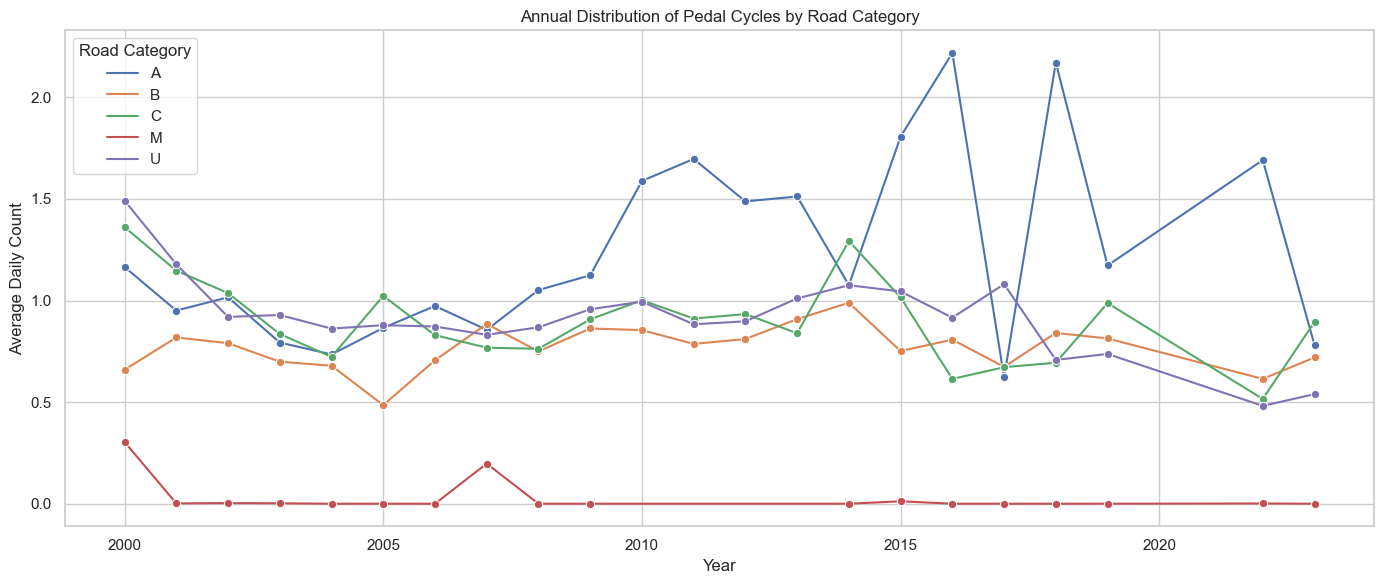

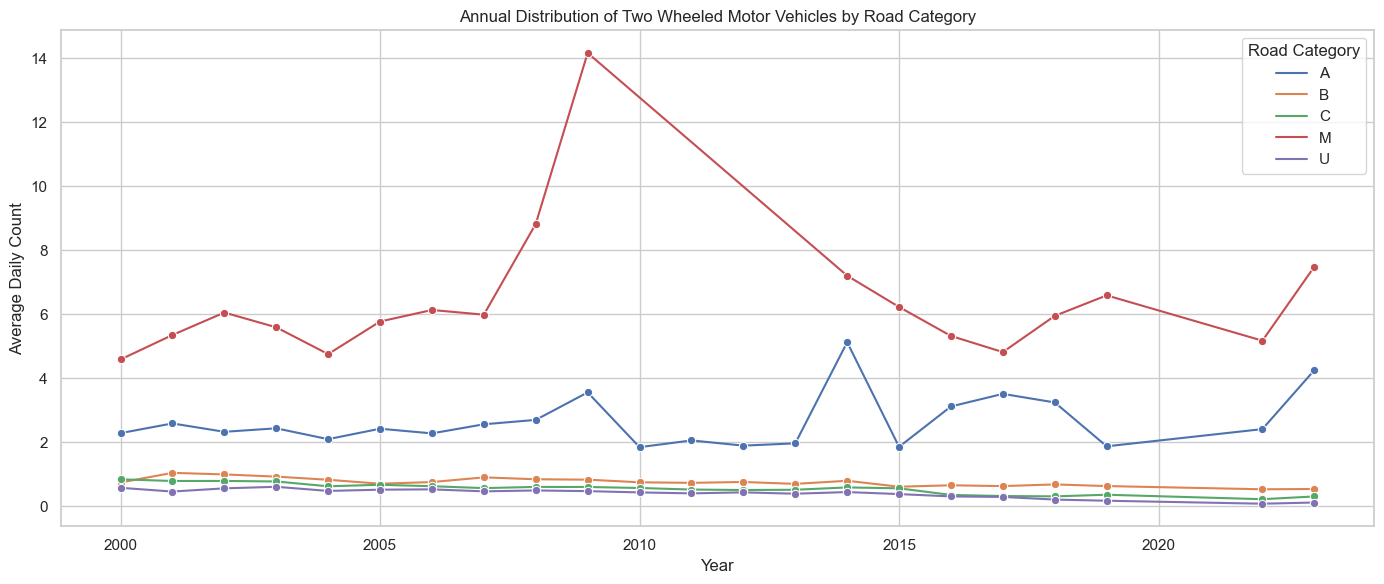

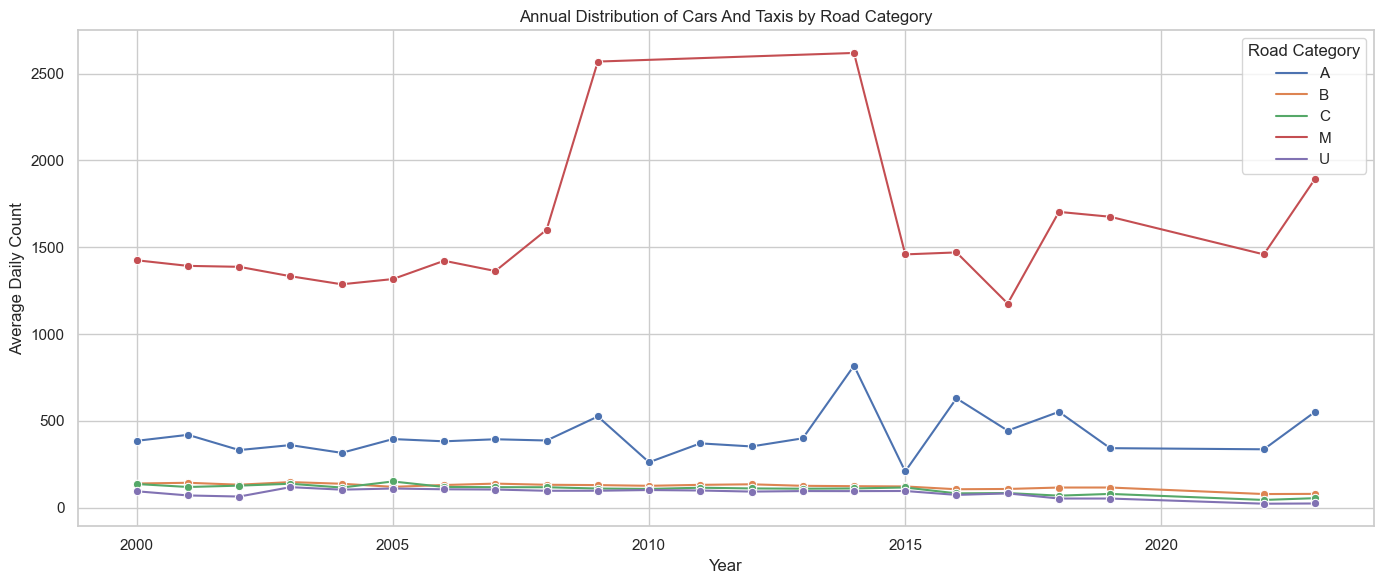

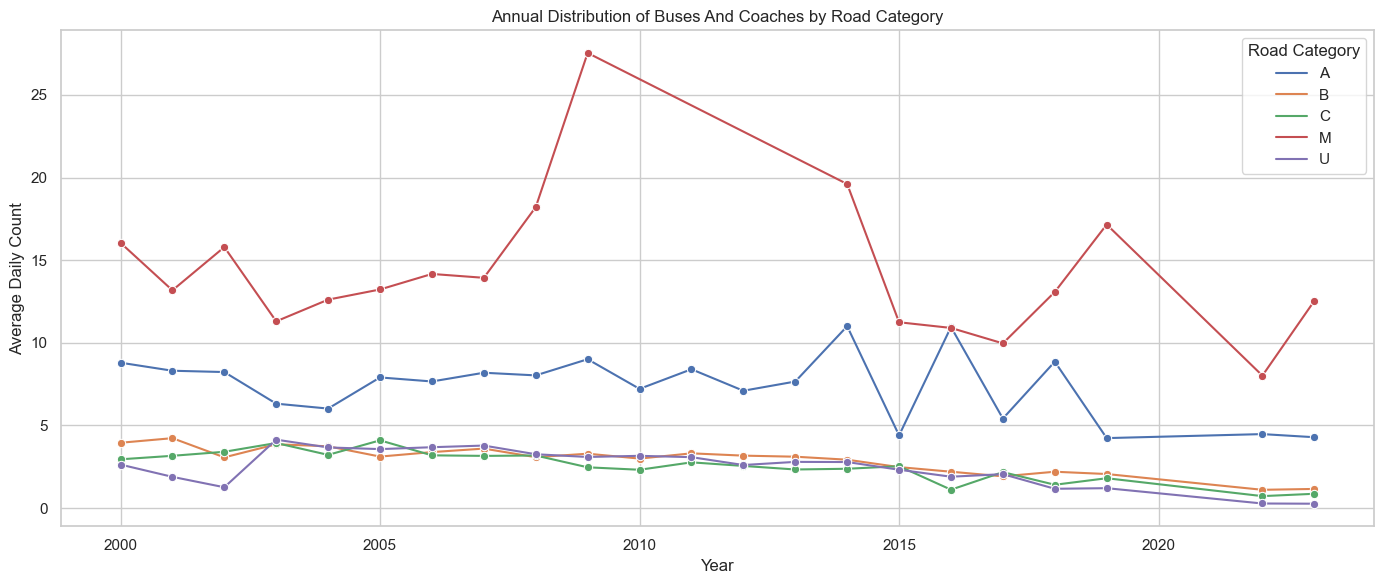

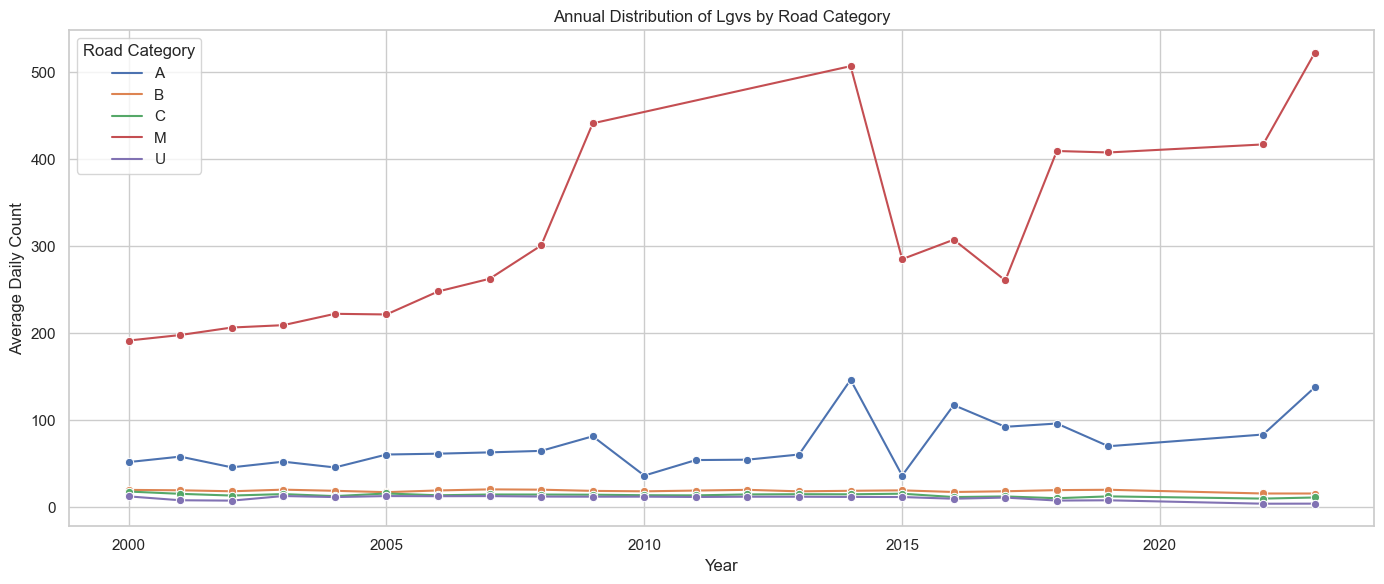

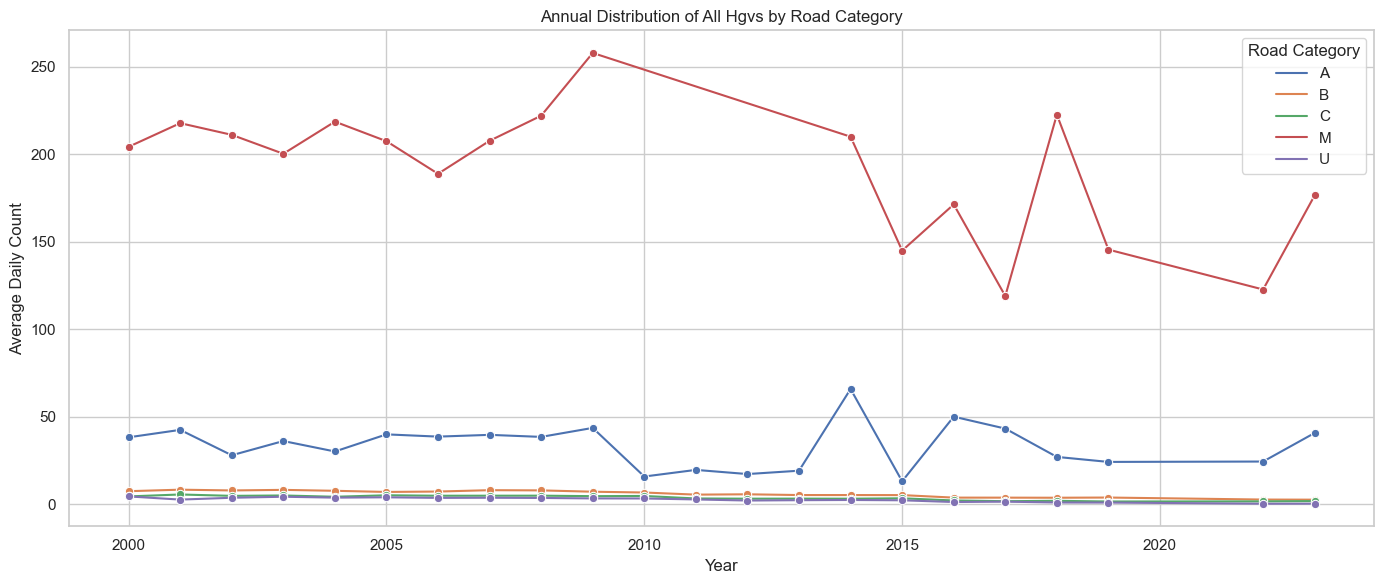

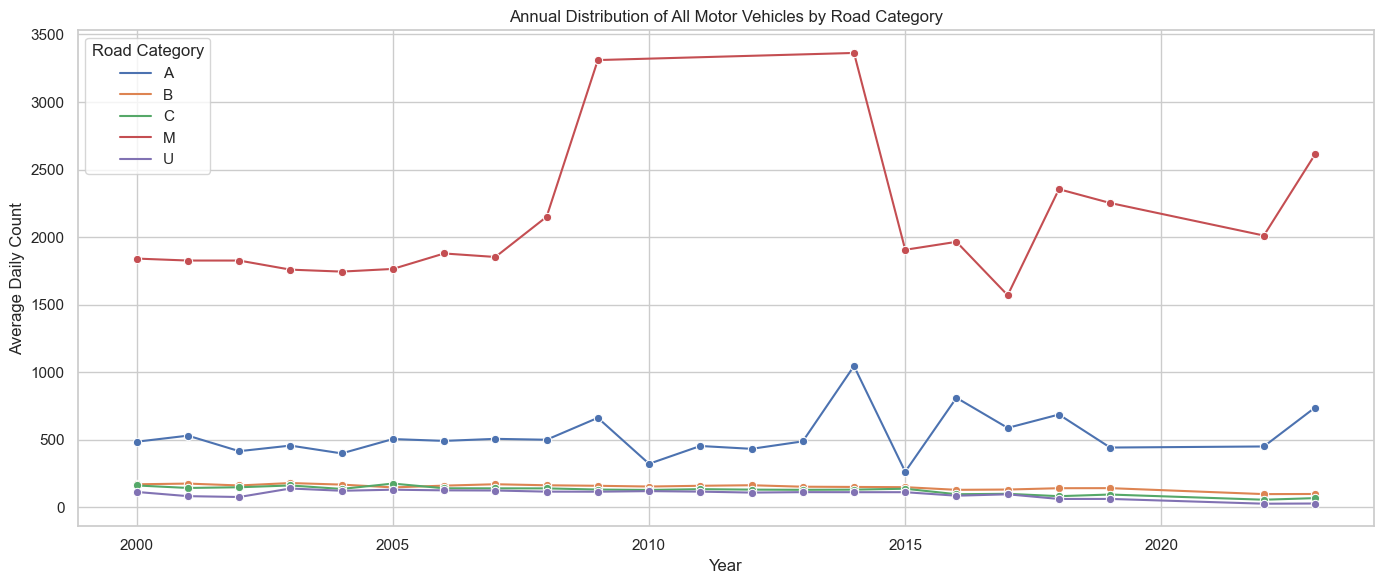

In [14]:
# 移除异常年份（2020 和 2021 年）
data_no_covid = data_cleaned[~data_cleaned['year'].isin([2020, 2021])]

# 按年和道路类型重新聚合数据
annual_road_vehicle_distribution_no_covid = data_no_covid.groupby(['year', 'road_category'])[vehicle_columns].mean().reset_index()
#  设置可视化风格
sns.set(style="whitegrid")

# 年度变化图表：不同道路类型的车辆类型分布趋势
for vehicle in vehicle_columns:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=annual_road_vehicle_distribution_no_covid, x='year', y=vehicle, hue='road_category', marker="o")
    plt.title(f"Annual Distribution of {vehicle.replace('_', ' ').title()} by Road Category")
    plt.xlabel("Year")
    plt.ylabel("Average Daily Count")
    plt.legend(title="Road Category")
    plt.tight_layout()  # 自动调整布局避免图表拥挤
    plt.show()

